In [1]:
from __future__ import print_function
import collections
import io
import pandas as pd
import numpy as np
import math
import operator
import sys
import networkx as nx
from textpre import cleanText

In [2]:
nodeHash = {}
textRank = {}
word_dict = collections.defaultdict(dict)
size = 0
sentences = []

In [3]:
word_dict, sentences, size = cleanText('test.txt')
print(size)
print(word_dict)
window = 3
numberofSentences = 6
n = int(math.ceil(min(0.1 * size, 7 * math.log(size))))
word_score = collections.defaultdict(dict)
count = 0
for i in word_dict.keys():
    for j in range(0, len(word_dict[i])):
        count += 1
        position = float(count) / (float(size) + 1.0)
        word_score[i][j] = 1.0 / (math.pi * math.sqrt(position * (1 - position)))
        word = word_dict[i][j]
        if word in nodeHash:
            if nodeHash[word] < word_score[i][j]:
                nodeHash[word] = word_score[i][j]
        else:
            nodeHash[word] = word_score[i][j]

169
{0: ['शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', '14', 'जूनपासून', 'नवे', 'शैक्षणिक', 'वर्ष'], 1: ['मुंबई', ':', 'शिक्षकां', 'विद्यार्थ्यां', 'ऑनलाईन', 'शिक्षणातून', 'अखेर', 'विश्रां', 'देण्या'], 2: ['राज्याती', 'प्राथमिक', 'माध्यमिक', 'उच्च', 'माध्यमिक', 'शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', 'करण्या', 'आल्या'], 3: ['1', 'मे', '13', 'जून', 'दरम्यान', 'शाळां', 'सुट्टी', 'राहणार'], 4: ['14', 'जूनपासून', 'नवे', 'शैक्षणिक', 'वर्ष'], 5: ['राज्याती', 'शिक्षक', 'संघटनाकडून', 'वारंवार', 'केल्', 'मागणीनंतर', 'शाळां', 'सुट्टी', 'जाहीर', 'करण्या', 'आल्या'], 6: ['विदर्भाती', 'तापमान', 'विचारा', 'घेता', '28', 'जूनपासून', 'शाळा'], 7: ['कोरोनाच्', 'पार्श्वभूमीवर', 'मागील', 'वर्षभरापासून', 'शाळा', 'जरी', 'ठिकाणी', 'बंदच', 'राहिल्', 'ऑनलाइन', 'वर्ग'], 8: ['ऑनलाइन', 'शिक्षण', 'देऊन', 'अभ्यासक्र', 'यावर्षी', 'शिक्षकां', 'पूर्ण'], 9: ['कोरोना', 'राज्याती', 'सद्यस्थि', 'नुकताच', 'इयत्ता', 'पहिली', 'आठवी', 'विद्यार्थ्यां', 'परीक्षा', 'रद्द', 'त्यां', 'पास', 'पुढील', 'वर्गा', 'प्रमोट', 'इयत

In [4]:
for i in word_dict.keys():
    print(word_dict[i])

['शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', '14', 'जूनपासून', 'नवे', 'शैक्षणिक', 'वर्ष']
['मुंबई', ':', 'शिक्षकां', 'विद्यार्थ्यां', 'ऑनलाईन', 'शिक्षणातून', 'अखेर', 'विश्रां', 'देण्या']
['राज्याती', 'प्राथमिक', 'माध्यमिक', 'उच्च', 'माध्यमिक', 'शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', 'करण्या', 'आल्या']
['1', 'मे', '13', 'जून', 'दरम्यान', 'शाळां', 'सुट्टी', 'राहणार']
['14', 'जूनपासून', 'नवे', 'शैक्षणिक', 'वर्ष']
['राज्याती', 'शिक्षक', 'संघटनाकडून', 'वारंवार', 'केल्', 'मागणीनंतर', 'शाळां', 'सुट्टी', 'जाहीर', 'करण्या', 'आल्या']
['विदर्भाती', 'तापमान', 'विचारा', 'घेता', '28', 'जूनपासून', 'शाळा']
['कोरोनाच्', 'पार्श्वभूमीवर', 'मागील', 'वर्षभरापासून', 'शाळा', 'जरी', 'ठिकाणी', 'बंदच', 'राहिल्', 'ऑनलाइन', 'वर्ग']
['ऑनलाइन', 'शिक्षण', 'देऊन', 'अभ्यासक्र', 'यावर्षी', 'शिक्षकां', 'पूर्ण']
['कोरोना', 'राज्याती', 'सद्यस्थि', 'नुकताच', 'इयत्ता', 'पहिली', 'आठवी', 'विद्यार्थ्यां', 'परीक्षा', 'रद्द', 'त्यां', 'पास', 'पुढील', 'वर्गा', 'प्रमोट', 'इयत्ता', '9', '11', 'वर्गाच्', 'परीक्षा', 'सुद्

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
Encodedoc=[]
vectorizer = CountVectorizer()
vectorizer.fit(sentences)
vector = vectorizer.transform(sentences)
Encodehead=vector.toarray()

In [6]:
Encodehead

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [7]:
sentences

['शाळांना 1 मे पासून सुट्ट्या जाहीर, 14 जूनपासून नवे शैक्षणिक वर्ष सुरू होणार.',
 'मुंबई : शिक्षकांना, विद्यार्थ्यांना ऑनलाईन शिक्षणातून अखेर विश्रांती देण्यात आली आहे.',
 'राज्यातील प्राथमिक, माध्यमिक, उच्च माध्यमिक शाळांना 1 मे पासून सुट्ट्या जाहीर करण्यात आल्या आहे.',
 '1 मे ते 13 जून दरम्यान शाळांना सुट्टी राहणार आहे.',
 'तर 14 जूनपासून नवे शैक्षणिक वर्ष सुरू होणार आहे.',
 'राज्यातील शिक्षक संघटनाकडून वारंवार केल्या जात असलेल्या मागणीनंतर शाळांना सुट्टी जाहीर करण्यात आल्या आहेत.',
 'विदर्भातील तापमान विचारात घेता 28 जूनपासून शाळा सुरू होणार आहेत.',
 'कोरोनाच्या पार्श्वभूमीवर मागील वर्षभरापासून शाळा जरी अनेक  ठिकाणी बंदच राहिल्या तरी ऑनलाइन वर्ग सुरू होते.',
 'ऑनलाइन शिक्षण देऊन अभ्यासक्रम यावर्षी शिक्षकांनी पूर्ण केला.',
 'मात्र, कोरोनाची राज्यातील सद्यस्थिती नुकताच इयत्ता पहिली ते आठवी विद्यार्थ्यांना परीक्षा रद्द करून व त्यांना पास करून पुढील वर्गात प्रमोट केले तर इयत्ता 9 ते 11 वर्गाच्या परीक्षा सुद्धा रद्द केल्या आहे.',
 'तरीसुद्धा, अनेक शाळांमध्ये ऑनलाइन वर्ग शिक्षकांकडून घेतल

In [8]:
for i in word_score.keys():
    print(word_score[i])

{0: 4.16251389624957, 1: 2.952088751682141, 2: 2.417576278920342, 3: 2.099979276742113, 4: 1.8839617210495745, 5: 1.725049253233326, 6: 1.6019768154208658, 7: 1.5031300180901226, 8: 1.421558891024632, 9: 1.3528170162811104, 10: 1.2939102223055614}
{0: 1.2427388697332036, 1: 1.1977813491387794, 2: 1.1579044731296155, 3: 1.1222447181542838, 4: 1.0901310178436154, 5: 1.0610329539459689, 6: 1.0345250286090488, 7: 1.010261434310337, 8: 0.9879578613253304}
{0: 0.9673781350332867, 1: 0.9483242376553923, 2: 0.9306287461368367, 3: 0.9141490240360122, 4: 0.8987627061709565, 5: 0.8843641492740705, 6: 0.8708616136225161, 7: 0.8581750042054057, 8: 0.8462340447618231, 9: 0.8349767899915886, 10: 0.8243484043632163, 11: 0.814300152869732, 12: 0.8047885616119761}
{0: 0.7957747154594768, 1: 0.7872236671152374, 2: 0.7791039373029575, 3: 0.7713870899390274, 4: 0.764047369361548, 5: 0.7570613891937292, 6: 0.7504078643879609, 7: 0.7440673795546802}
{0: 0.7380221879205352, 1: 0.7322560362538553, 2: 0.7267540

In [9]:
nodeHash

{'शाळां': 4.16251389624957,
 '1': 2.952088751682141,
 'मे': 2.417576278920342,
 'पासून': 2.099979276742113,
 'सुट्ट्': 1.8839617210495745,
 'जाहीर': 1.725049253233326,
 '14': 1.6019768154208658,
 'जूनपासून': 1.5031300180901226,
 'नवे': 1.421558891024632,
 'शैक्षणिक': 1.3528170162811104,
 'वर्ष': 1.2939102223055614,
 'मुंबई': 1.2427388697332036,
 ':': 1.1977813491387794,
 'शिक्षकां': 1.1579044731296155,
 'विद्यार्थ्यां': 1.1222447181542838,
 'ऑनलाईन': 1.0901310178436154,
 'शिक्षणातून': 1.0610329539459689,
 'अखेर': 1.0345250286090488,
 'विश्रां': 1.010261434310337,
 'देण्या': 0.9879578613253304,
 'राज्याती': 0.9673781350332867,
 'प्राथमिक': 0.9483242376553923,
 'माध्यमिक': 0.9306287461368367,
 'उच्च': 0.9141490240360122,
 'करण्या': 0.814300152869732,
 'आल्या': 0.8047885616119761,
 '13': 0.7791039373029575,
 'जून': 0.7713870899390274,
 'दरम्यान': 0.764047369361548,
 'सुट्टी': 0.7713870899390274,
 'राहणार': 0.7440673795546802,
 'शिक्षक': 0.7071287822089697,
 'संघटनाकडून': 0.702762086379797

In [10]:
graph = nx.Graph()
graph.add_nodes_from(nodeHash.keys())
for i in word_dict.keys():
    for j in range(0, len(word_dict[i])):
        current_word = word_dict[i][j]
        next_words = word_dict[i][j + 1:j + window]
        for word in next_words:
            graph.add_edge(current_word, word,unicode='utf-8', weight=(nodeHash[current_word] + nodeHash[word]) / 2)
textRank = nx.pagerank(graph, weight='weight')
keyphrases = sorted(textRank, key=textRank.get, reverse=True)[:n]

In [11]:
keyphrases

['शाळां',
 'निर्णय',
 'जाहीर',
 'वर्ग',
 'जूनपासून',
 'विद्यार्थ्यां',
 'शिक्षकां',
 'पार्श्वभूमीवर',
 'सुट्टी',
 'शाळा',
 'मे',
 'कोरो',
 '1',
 'ऑनलाइन',
 'इयत्ता',
 '14',
 'राज्याती']

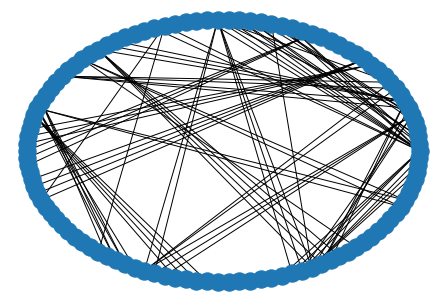

In [12]:
import matplotlib.pyplot as plt
nx.draw_circular(graph)

In [13]:
textRank

{'शाळां': 0.04144369382438503,
 '1': 0.013537782726960816,
 'मे': 0.0143113013600999,
 'पासून': 0.009439005457644126,
 'सुट्ट्': 0.010141351322950649,
 'जाहीर': 0.02432632817366035,
 '14': 0.012973939926480056,
 'जूनपासून': 0.01802693656433935,
 'नवे': 0.007816368567499368,
 'शैक्षणिक': 0.008710762926766816,
 'वर्ष': 0.009566397618897436,
 'मुंबई': 0.006057320130276333,
 ':': 0.008316350276399941,
 'शिक्षकां': 0.01665710951761193,
 'विद्यार्थ्यां': 0.017356189157313108,
 'ऑनलाईन': 0.009782646567684607,
 'शिक्षणातून': 0.009743134916756428,
 'अखेर': 0.009953295431495809,
 'विश्रां': 0.007760269191783369,
 'देण्या': 0.00553646781189766,
 'राज्याती': 0.01266058495799851,
 'प्राथमिक': 0.005212785406830655,
 'माध्यमिक': 0.010850241616071576,
 'उच्च': 0.006226417765890517,
 'करण्या': 0.007595559524585358,
 'आल्या': 0.0034215619261030042,
 '13': 0.006069252872615003,
 'जून': 0.0067139267716201,
 'दरम्यान': 0.006005850493959461,
 'सुट्टी': 0.01487946047798245,
 'राहणार': 0.004410487508028308,
 

In [14]:
sentenceScore = {}
for i in word_dict.keys():
    position = float(i + 1) / (float(len(sentences)) + 1.0)
    positionalFeatureWeight = 1.0 / (math.pi * math.sqrt(position * (1.0 - position)))
    sumKeyPhrases = 0.0
    for keyphrase in keyphrases:
        if keyphrase in word_dict[i]:
            sumKeyPhrases += textRank[keyphrase]
    sentenceScore[i] = sumKeyPhrases * positionalFeatureWeight
sSentenceScores = sorted(sentenceScore.items(), key=operator.itemgetter(1), reverse=True)[:numberofSentences]
sSentenceScores = sorted(sSentenceScores, key=operator.itemgetter(0), reverse=False)

In [15]:
sSentenceScores

[(0, 0.1685880329973675),
 (2, 0.08874107526846929),
 (3, 0.06316350965056515),
 (5, 0.062152068086263654),
 (12, 0.08143814514561382),
 (13, 0.07304063861556223)]

In [16]:
stri="./Result/test_op.txt"
tp=open(stri, 'w',encoding="utf-8")
for i in range(0, len(sSentenceScores)):
    print(sentences[sSentenceScores[i][0]])
    tp.write(sentences[sSentenceScores[i][0]])
tp.close()

शाळांना 1 मे पासून सुट्ट्या जाहीर, 14 जूनपासून नवे शैक्षणिक वर्ष सुरू होणार.
राज्यातील प्राथमिक, माध्यमिक, उच्च माध्यमिक शाळांना 1 मे पासून सुट्ट्या जाहीर करण्यात आल्या आहे.
1 मे ते 13 जून दरम्यान शाळांना सुट्टी राहणार आहे.
राज्यातील शिक्षक संघटनाकडून वारंवार केल्या जात असलेल्या मागणीनंतर शाळांना सुट्टी जाहीर करण्यात आल्या आहेत.
याची दखल घेत, आज शाळांना सुट्टी देण्याबाबत निर्णय जाहीर करण्यात आला.
नवे शैक्षणिक वर्ष जरी 14 जूनपासून सुरू होणार असले तरी प्रत्यक्ष शाळा सुरू होण्याबाबतचा निर्णय कालांतराने कोरोना परिस्थितीचा आढावा घेऊन त्याबाबत कळविले जाणार आहे.
